In [1]:
# Importar librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples

In [2]:
# Visualizacion del DF entero

pd.set_option('display.max_columns', None)

# Importar Datos

In [4]:
datas = pd.read_csv("datas.csv")
datas

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,1981-09-29,180,468.0,Elche,53,La Liga 2,SUB,45,Espana,Izq,36,38,40,45,48,48,25,25,25,21,25,25,25,25,22,34,41,49,55,66,60,30,78,32,60,25,36,25,25,25,25,25,25,25,75,74,68,77,80,45,33,33,33,32,32,32,32,32,31,31,31,31,29,29,29,31,31,32,32,32,31,31,34,34,34,31,76,elche cf,2015.0,53.0,la liga 2,45.0,espana,72.0,72.0,71.0,72.0,25.91,24.62
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,2002-12-02,174,113057.0,Al Fayha,350,Pro League,RES,183,Arabia Saudita,Dch,66,34,44,49,54,63,37,30,48,50,33,47,32,37,49,45,62,69,59,46,75,49,56,74,60,28,57,52,33,43,35,55,57,56,13,12,6,8,5,8,44,44,44,45,44,44,44,45,45,45,45,47,47,47,47,47,53,53,53,53,53,54,54,54,54,54,13,al fayha,2018.0,350.0,pro league,183.0,arabia saudita,66.0,66.0,67.0,61.0,26.36,26.82
180017,278138,Josh Keyes,2024,MEC,51,130000,500,17,2006-04-26,178,1934.0,Swindon Town,61,League Two,RES,14,Inglater

In [5]:
# Revisamos las columnas de nuestro DF

datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 97 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_jugador               180021 non-null  int64  
 1   nombre_jugador           180021 non-null  object 
 2   version_x                180021 non-null  int64  
 3   posiciones               180021 non-null  object 
 4   est_general_x            180021 non-null  int64  
 5   valor_de_mercado         180021 non-null  int64  
 6   salario_semanal          180021 non-null  int64  
 7   edad                     180021 non-null  int64  
 8   nacimiento               180021 non-null  object 
 9   altura                   180021 non-null  int64  
 10  id_equipo                180021 non-null  float64
 11  nombre_club_x            180021 non-null  object 
 12  id_liga_x                180021 non-null  int64  
 13  nombre_liga_x            180021 non-null  object 
 14  posi

# Matriz de correlacion

In [7]:
# Obtenemos el coeficiente de correlación entre las variables numéricas

datas_numerica = datas.select_dtypes(include=['float64', 'int64'])
correlacion = datas_numerica.corr().round(2)
correlacion

,id_jugador,version_x,est_general_x,valor_de_mercado,salario_semanal,edad,altura,id_equipo,id_liga_x,id_nacionalidad_x,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,version_y,id_liga_y,id_nacionalidad_y,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
id_jugador,1.00,0.47,-0.37,-0.07,-0.25,-0.63,-0.07,0.12,0.16,0.09,0.11,-0.16,-0.22,-0.10,-0.15,-0.18,-0.13,-0.08,-0.12,-0.12,-0.16,-0.03,-0.15,-0.19,-0.16,-0.10,0.10,0.09,-0.02,-0.37,0.03,-0.17,-0.16,-0.07,-0.24,-0.16,-0.21,-0.15,-0.08,-0.16,-0.15,-0.09,-0.08,-0.06,-0.09,-0.09,-0.09,-0.09,-0.09,-0.12,-0.12,-0.12,-0.12,-0.09,-0.11,-0.11,-0.11,-0.09,-0.11,-0.11,-0.11,-0.10,-0.15,-0.15,-0.15,-0.10,-0.12,-0.16,-0.16,-0.16,-0.12,-0.11,-0.15,-0.15,-0.15,-0.11,-0.10,0.24,0.15,0.07,-0.04,-0.04,-0.03,-0.04,0.01,0.01
version_x,0.47,1.00,0.04,0.08,-0.08,0.03,0.03,0.06,0.17,0.03,-0.01,0.01,0.04,0.03,0.02,-0.01,-0.01,0.01,-0.02,0.04,-0.03,0.03,0.00,-0.03,0.04,0.02,-0.01,-0.02,0.00,0.01,0.00,0.05,0.00,-0.01,-0.01,-0.02,-0.00,-0.00,0.01,0.07,-0.04,0.04,0.01,0.01,-0.00,0.00,0.00,0.00,-0.00,-0.03,0.02,0.02,0.02,0.01,0.03,0.03,0.03,0.01,0.03,0.03,0.03,0.02,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.02,0.02,0.35,0.17,0.05,0.02,0.02,0.03,0.03,0.05,0.06
est_general_x,-0.37,0.04,1.00,0.56,0.60,0.46,0.04,-0.18,-0.16,-0.10,0.17,0.45,0.61,0.50,0.33,0.41,0.40,0.33,0.34,0.50,0.38,0.37,0.42,0.39,0.49,0.46,0.19,0.21,0.26,0.85,0.10,0.49,0.30,0.36,0.35,0.41,0.40,0.31,0.35,0.50,0.33,0.28,0.25,0.22,-0.01,-0.01,-0.02,-0.01,-0.01,-0.00,0.48,0.48,0.48,0.45,0.47,0.47,0.47,0.45,0.49,0.49,0.49,0.47,0.54,0.54,0.54,0.47,0.45,0.48,0.48,0.48,0.45,0.42,0.39,0.39,0.39,0.42,0.05,-0.15,-0.15,-0.14,0.32,0.30,0.31,0.31,-0.02,-0.02
valor_de_mercado,-0.07,0.08,0.56,1.00,0.78,0.06,0.01,-0.16,-0.09,-0.07,0.14,0.28,0.36,0.31,0.14,0.18,0.22,0.22,0.16,0.29,0.24,0.24,0.25,0.22,0.28,0.27,0.15,0.16,0.17,0.48,0.11,0.27,0.13,0.19,0.12,0.24,0.17,0.13,0.23,0.32,0.20,0.12,0.11,0.09,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.29,0.29,0.29,0.28,0.29,0.29,0.29,0.28,0.30,0.30,0.30,0.29,0.31,0.31,0.31,0.29,0.24,0.24,0.24,0.24,0.24,0.22,0.18,0.18,0.18,0.22,0.02,-0.10,-0.09,-0.09,0.30,0.30,0.30,0.29,0.02,0.02
salario_semanal,-0.25,-0.08,0.60,0.78,1.00,0.16,0.02,-0.20,-0.13,-0.07,0.13,0.30,0.39,0.33,0.17,0.21,0.25,0.23,0.21,0.31,0.27,0.25,0.28,0.25,0.30,0.29,0.14,0.15,0.17,0.53,0.09,0.30,0.17,0.20,0.16,0.26,0.22,0.17,0.24,0.33,0.24,0.14,0.14,0.12,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,0.31,0.31,0.31,0.29,0.31,0.31,0.31,0.29,0.32,0.32,0.32,0.30,0.34,0.34,0.34,0.30,0.27,0.28,0.28,0.28,0.27,0.25,0.22,0.22,0.22,0.25,0.01,-0.17,-0.13,-0.11,0.36,0.36,0.36,0.35,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ataque,-0.04,0.02,0.30,0.30,0.36,-0.03,0.02,-0.06,-0.02,-0.05,0.05,0.13,0.19,0.17,0.09,0.07,0.11,0.09,0.09,0.16,0.11,0.13,0.13,0.10,0.14,0.14,0.06,0.06,0.07,0.26,0.03,0.15,0.07,0.05,0.05,0.11,0.09,0.08,0.10,0.15,0.09,0.07,0.07,0.07,0.00,0.00,0.00,0.00,0.00,-0.00,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.15,0.15,0.15,0.14,0.

# Calcular PCA

## Estandarizar los datos

In [10]:
# Variable con las columnas que no vamos a estandarizar

columnas_utiles = ["est_general_x", "valor_de_mercado", "edad", "ritmo", "chut", "pase", "regate", "defensa_x", 
                   "fisico", "finalizacion", "eficacia_faltas", "habilidad_pase_largo", "aceleracion", "equilibrio", 
                   "potencia_tiro", "aguante", "anticipacion", "posicionamiento", "vision_juego", "marcaje", "entrada", 
                   "estirada", "posicion_por"]


columnas_a_estandarizar = [col for col in datas_numerica.columns if col in columnas_utiles]

scaler = StandardScaler()
datas_numerica[columnas_a_estandarizar] = scaler.fit_transform(datas_numerica[columnas_a_estandarizar])
# Ahora, las columnas seleccionadas están estandarizadas, con media 0 y desviación estándar 1.

datas_numerica[columnas_a_estandarizar]

,est_general_x,valor_de_mercado,edad,ritmo,chut,pase,regate,defensa_x,fisico,finalizacion,eficacia_faltas,habilidad_pase_largo,aceleracion,equilibrio,potencia_tiro,aguante,anticipacion,posicionamiento,vision_juego,marcaje,entrada,estirada,posicion_por
0,0.325914,-0.272351,1.466288,0.450367,0.614608,0.955012,0.528640,1.303395,0.865751,0.171784,0.928806,1.007818,0.223463,0.216473,1.058657,0.877532,1.243359,0.673524,-0.154120,1.180717,1.303144,-0.198735,-0.427821
1,0.325914,-0.272351,1.466288,-0.673052,0.817215,1.214433,0.684911,0.397464,0.564654,0.431105,0.347284,1.073729,-0.790766,-0.067561,0.993256,-0.571225,0.802492,0.725522,1.325391,0.007263,0.537580,-0.595075,-0.545403
2,1.180848,0.008015,1.466288,-0.200033,1.357498,1.992699,1.622537,-0.810443,-0.489188,1.209068,1.917392,1.007818,-0.182229,1.281600,0.993256,-1.894003,-0.422140,1.141504,1.959467,-0.579464,-0.802157,-0.481835,-0.075073
3,1.465826,0.316823,1.466288,-1.619088,-0.803637,-1.293311,-1.112205,-0.085699,-1.016109,-1.072956,-1.048367,-2.024068,-1.602149,-0.280586,-1.753557,-1.956993,-1.058949,-1.302393,-1.985896,-1.019509,-0.993548,3.311704,3.569982
4,3.318183,5.469045,1.038880,0.686876,1.492569,2.943912,2.482027,0.578650,0.113007,1.416525,1.568479,2.391940,0.764385,1.565634,0.535454,0.940521,1.047418,1.921471,2.804902,0.545096,0.489732,-0.595075,-0.192656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,-1.668933,-0.341426,-1.098157,0.154731,-1.073779,-0.947415,-0.799663,0.276673,0.113007,-0.813635,-0.350542,-0.244483,-0.182229,0.784541,-0.510951,0.688564,0.263653,-0.886411,-0.717744,0.447308,0.489732,-0.198735,-0.486612
180017,-2.096400,-0.360930,-1.739268,0.391240,-0.330889,-0.515046,-0.408985,-0.508466,-0.639737,-0.139401,-0.350542,-0.112662,0.629155,1.068575,-0.314750,-0.004320,-0.373155,-0.158441,-0.154120,-0.237207,-0.275832,-0.142115,-0.604194
180018,-1.098977,-0.321110,-1.098157,-2.328616,-1.411456,-0.774467,-2.127966,-1.052025,-2.220500,-1.902783,-1.920650,-0.639946,-3.022070,-1.345713,-0.837953,-2.082972,-1.548802,-2.082361,-1.140461,-1.557342,-1.663417,2.462404,2.217784
180019,-1.526444,-0.337363,-1.525564,0.213858,-1.073779,-1.293311,-0.799663,0.216278,-1.091384,-0.813635,-0.641302,-1.364963,0.155848,-0.422603,-0.707152,-1.327098,0.459595,-0.158441,-0.717744,0.349520,0.441884,-0.425215,-0.604194


In [11]:
# Verificamos que las columnas estandarizados son las deseadas

datas_numerica[columnas_a_estandarizar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   est_general_x         180021 non-null  float64
 1   valor_de_mercado      180021 non-null  float64
 2   edad                  180021 non-null  float64
 3   ritmo                 180021 non-null  float64
 4   chut                  180021 non-null  float64
 5   pase                  180021 non-null  float64
 6   regate                180021 non-null  float64
 7   defensa_x             180021 non-null  float64
 8   fisico                180021 non-null  float64
 9   finalizacion          180021 non-null  float64
 10  eficacia_faltas       180021 non-null  float64
 11  habilidad_pase_largo  180021 non-null  float64
 12  aceleracion           180021 non-null  float64
 13  equilibrio            180021 non-null  float64
 14  potencia_tiro         180021 non-null  float64
 15  

In [12]:
len(datas_numerica[columnas_a_estandarizar].columns)

23

## Reducir dimensionalidad

In [14]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(datas_numerica[columnas_a_estandarizar])

In [15]:
# Analizamos la relacion entre las nuevas variables creadas mediante PCA

pd.DataFrame(X_pca).corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
1,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
2,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
3,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
4,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
5,-0.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
6,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
7,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
8,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
9,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0


## Varianza 

### Varianza artesanal

In [18]:
# Obtenemos el desvío y al elevarlo al cuadrado nos quedamos con la varianza

autovalores = pca.singular_values_ ** 2
autovalores

array([2.01282100e+06, 7.82344869e+05, 4.37926178e+05, 1.96589538e+05,
       1.58448103e+05, 1.30914201e+05, 7.52366957e+04, 5.72140568e+04,
       5.03804127e+04, 4.59275940e+04, 4.05760136e+04, 3.46957324e+04,
       2.67925816e+04, 1.91980889e+04, 1.70540515e+04, 1.38412214e+04,
       1.09868431e+04, 1.02924700e+04, 5.88887677e+03, 5.43925712e+03,
       4.94621671e+03, 1.79660004e+03, 1.17240352e+03])

In [19]:
# Porcentaje de la varianza que contiene cada componente principal 

porcentaje=autovalores/ autovalores.sum() 
porcentaje

array([4.86131931e-01, 1.88950146e-01, 1.05766931e-01, 4.74798563e-02,
       3.82680240e-02, 3.16180989e-02, 1.81709949e-02, 1.38182084e-02,
       1.21677622e-02, 1.10923276e-02, 9.79982617e-03, 8.37963406e-03,
       6.47088313e-03, 4.63667860e-03, 4.11885557e-03, 3.34290019e-03,
       2.65351727e-03, 2.48581387e-03, 1.42226807e-03, 1.31367696e-03,
       1.19459897e-03, 4.33910738e-04, 2.83156222e-04])

In [20]:
porcentaje.cumsum()

array([0.48613193, 0.67508208, 0.78084901, 0.82832886, 0.86659689,
       0.89821499, 0.91638598, 0.93020419, 0.94237195, 0.95346428,
       0.96326411, 0.97164374, 0.97811462, 0.9827513 , 0.98687016,
       0.99021306, 0.99286658, 0.99535239, 0.99677466, 0.99808833,
       0.99928293, 0.99971684, 1.        ])

### Varianza simplificada

In [22]:
# Identificamos los componentes que contienen la mayor parte de la varianza (variabilidad de los datos)

variabilidad = pca.explained_variance_ratio_
variabilidad

array([4.86131931e-01, 1.88950146e-01, 1.05766931e-01, 4.74798563e-02,
       3.82680240e-02, 3.16180989e-02, 1.81709949e-02, 1.38182084e-02,
       1.21677622e-02, 1.10923276e-02, 9.79982617e-03, 8.37963406e-03,
       6.47088313e-03, 4.63667860e-03, 4.11885557e-03, 3.34290019e-03,
       2.65351727e-03, 2.48581387e-03, 1.42226807e-03, 1.31367696e-03,
       1.19459897e-03, 4.33910738e-04, 2.83156222e-04])

In [23]:
# Seleccionamos los componentes mas relevantes de la varianza realizada

variabilidad[0:4]

array([0.48613193, 0.18895015, 0.10576693, 0.04747986])

In [24]:
sum(variabilidad[0:4])

0.8283288640978408

In [25]:
# Creamos un df solo con los componentes que representan de manera más concreta los datos

data_clean = pd.DataFrame(X_pca).loc[:,0:4]

In [26]:
data_clean.head(2)

,0,1,2,3,4
0,-2.945601,-1.843479,0.855441,-0.956539,-0.472914
1,-2.093976,-0.237244,1.687848,-1.559486,-0.994982


### Grafico de la Varianza

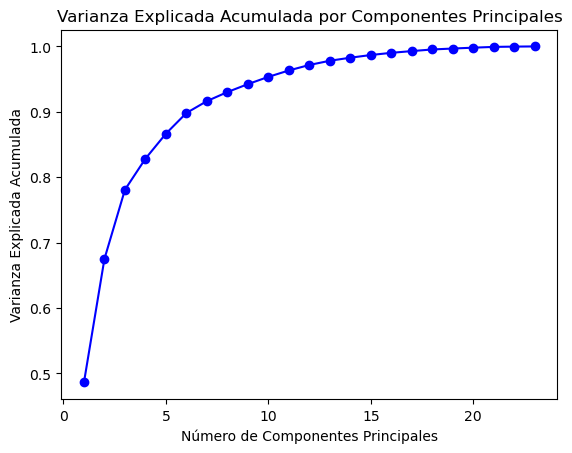

In [28]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', color='b')

# Añadir etiquetas
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.show()

# K-Means

In [30]:
# Queremos determinar el número óptimo de clusters que existen en los datos

acum = []
for i in range(2,9):
    model = KMeans(
        n_clusters = i, 
        n_init = 10, 
        max_iter = 300 
    )
    model.fit(data_clean)
    acum.append([i,model.inertia_])

## Grafico del codo

In [32]:
# Creamos un df para organizar los datos de manera que se puedan visualizar en un gráfico

tabla_codo = pd.DataFrame(acum,columns=["clusters", "Error"])
tabla_codo

,clusters,Error
0,2,2.156352e+06
1,3,1.531243e+06
2,4,1.120167e+06
3,5,9.668161e+05
4,6,8.633219e+05
5,7,7.864287e+05
6,8,7.125604e+05


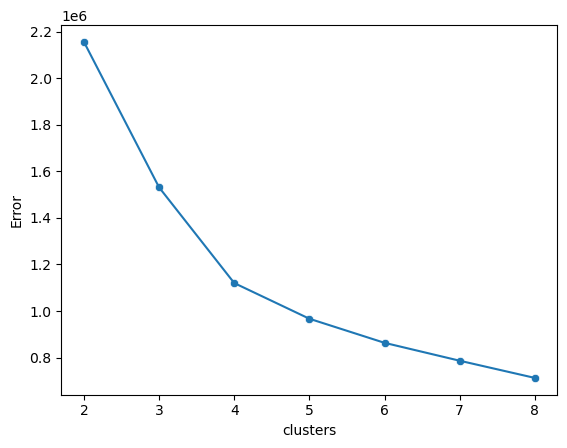

In [33]:
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")
sns.scatterplot(data = tabla_codo, x="clusters", y = "Error")
plt.show()

## Modelo

In [35]:
# Creamos un modelo que agrupa los datos en 4 grupos distintos (usamos el df data_clean)

model = KMeans(
    n_clusters = 4, 
    n_init = 10, 
    max_iter = 300 
)

model.fit(data_clean)

KMeans(n_clusters=4, n_init=10)

## Silhouette

In [37]:
# Evaluamos la calidad de los clusters obtenidos

silhouette_avg = silhouette_score(data_clean, model.labels_)
print("La puntuación promedio de silueta es:", silhouette_avg)

La puntuación promedio de silueta es: 0.3579213180129638


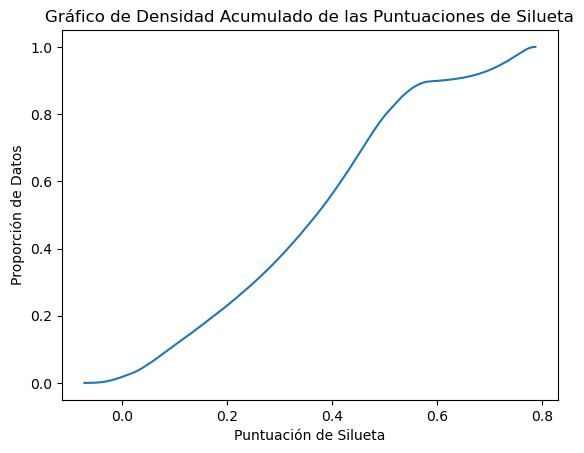

In [38]:
sample_silhouette_values = silhouette_samples(data_clean, model.labels_)

plt.plot(np.sort(sample_silhouette_values), np.arange(len(sample_silhouette_values)) / len(sample_silhouette_values))
plt.xlabel('Puntuación de Silueta')
plt.ylabel('Proporción de Datos')
plt.title('Gráfico de Densidad Acumulado de las Puntuaciones de Silueta')
plt.show()

# Creacion de clusters

In [40]:
# Creamos una variable para poder analizar de manera más eficiente los clusters generados 

data_final = datas[columnas_utiles]

In [41]:
# Incorporamos los grupos encontrados por el modelo en nuestro DF

data_final["cluster"] = model.labels_

C:\Users\redon\AppData\Local\Temp\ipykernel_4908\153141645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["cluster"] = model.labels_


## Agrupar clusters

In [173]:
# Al agruparlos podemos analizar y entender los resultados que nos arroja el modelo
# Generamos un perfil para cada clusters

data_final.groupby("cluster").mean()

,est_general_x,valor_de_mercado,edad,ritmo,chut,pase,regate,defensa_x,fisico,finalizacion,eficacia_faltas,habilidad_pase_largo,aceleracion,equilibrio,potencia_tiro,aguante,anticipacion,posicionamiento,vision_juego,marcaje,entrada,estirada,posicion_por
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,63.921779,1.333904e+06,23.730324,72.066322,60.192916,55.408890,64.860175,31.735709,58.726845,61.094302,47.217325,50.461759,72.118840,69.136716,63.207073,62.216658,28.858454,61.428524,56.883954,29.237514,28.074206,10.364940,10.375099
1,62.852824,9.383912e+05,24.212658,62.162971,36.484949,48.854691,52.322874,61.296944,66.670801,31.920401,34.927088,50.952980,61.596536,60.034122,47.172077,64.802964,60.351966,39.818435,43.336267,60.492817,61.544906,10.386184,10.401349
2,70.862284,5.021428e+06,27.108781,69.799401,59.754101,66.593547,69.091742,61.059703,69.175442,55.889647,57.177705,66.634228,70.023436,70.303114,67.862733,74.383522,62.031348,62.725428,65.579052,59.914542,59.709904,10.512429,10.549649
3,64.293175,1.665853e+06,26.106346,26.025313,30.975785,38.658845,35.854411,34.928054,34.931399,12.966748,15.183434,26.205053,38.562135,43.272105,35.327675,30.618154,17.395926,12.301363,35.953318,14.767637,14.916421,65.147286,62.886315


In [44]:
data_final.shape

(180021, 24)

## Grafico clusters

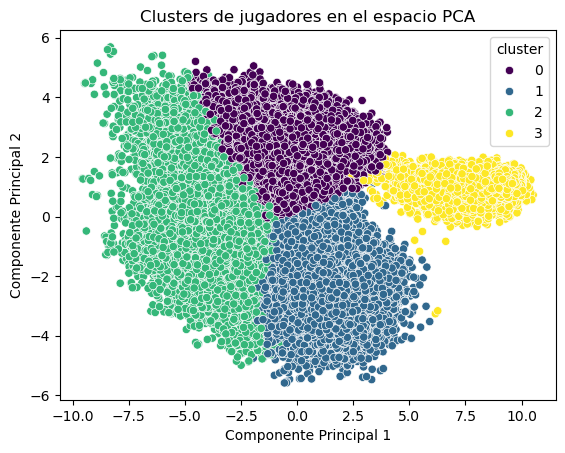

In [77]:
sns.scatterplot(x=0, y=1, hue = data_final["cluster"], data=data_clean, palette='viridis')
plt.title("Clusters de jugadores en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


# Union de datas y data_final
##  Crear CSV

In [197]:
if len(datas) == len(data_final):
    cluster_data = data_final[['cluster']]
    
    data_completa = pd.concat([datas, cluster_data], axis=1)

     
    data_completa['categoria'] = data_completa['cluster'].map({
        0: 'Promesas',
        1: 'Secundarios',
        2: 'Estrellas',
        3: 'Otros'
    })
  
    data_completa.to_csv('data_completa.csv', index=False)
else:
    print("Las tablas no tienen el mismo número de filas.")

In [199]:
data_completa = pd.read_csv("data_completa.csv")
data_completa


,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,id_equipo,nombre_club_x,id_liga_x,nombre_liga_x,posicion_club,id_nacionalidad_x,nacionalidad,pierna,ritmo,chut,pase,regate,defensa_x,fisico,centros_ataque,finalizacion,remate_cabeza,pase_corto_ataque,volea,habilidad_regate,efecto,eficacia_faltas,habilidad_pase_largo,habilidad_control,aceleracion,velocidad_max,agilidad,reaccion,equilibrio,potencia_tiro,potencia_salto,aguante,fortaleza,fuerza_chuts_lejanos,agresividad,anticipacion,posicionamiento,vision_juego,penalties,marcaje,abordaje,entrada,estirada,manejo,pateo,posicion_por,reflejos,velocidad_por,del_izq,del,del_dch,extr_izq,seg_del_izq,media_punta,seg_del_dch,extr_dch,med_cen_def_izq,med_cen_of,med_cen_of_izq,med_izq,med_cen_izq,med_cen,med_cen_dch,med_dch,carr_izq,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero,nombre_club_y,version_y,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo,cluster,categoria
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,1982-01-05,181,55.0,Udinese,31,Serie A,LM,27,Italia,Izq,71,59,66,66,71,73,76,49,59,68,57,63,67,59,68,69,68,73,67,72,67,73,67,77,69,67,77,72,63,51,49,70,73,73,13,4,14,9,11,10,63,63,63,67,64,64,64,67,64,64,64,68,67,67,67,68,71,69,69,69,71,72,70,70,70,72,13,udinese calcio,2015.0,31.0,serie a,27.0,italia,74.0,75.0,72.0,74.0,26.18,24.97,2,Estrellas
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,1981-10-02,183,68.0,Metz,16,Ligue 1,RDM,18,Francia,Dch,52,62,69,68,56,69,64,54,60,73,61,65,69,49,69,73,53,52,74,68,63,72,70,54,79,71,63,63,64,72,65,46,59,57,6,7,10,7,12,8,63,63,63,66,66,66,66,66,69,69,69,66,68,68,68,66,62,65,65,65,62,60,62,62,62,60,12,fc metz,2015.0,16.0,ligue 1,18.0,francia,69.0,70.0,70.0,68.0,27.91,24.47,2,Estrellas
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,1981-11-08,176,2.0,Aston Villa,13,Premier League,SUB,14,Inglaterra,Dch,60,70,78,80,36,55,81,69,52,79,75,80,83,76,68,82,62,59,77,72,82,72,58,33,60,71,68,38,72,81,65,34,33,29,8,5,12,15,6,9,70,70,70,76,72,72,72,76,76,76,76,74,68,68,68,74,56,59,59,59,56,50,48,48,48,50,12,aston villa,2015.0,13.0,premier league,14.0,inglaterra,74.0,76.0,74.0,73.0,26.00,24.64,2,Estrellas
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,1981-09-29,180,468.0,Elche,53,La Liga 2,SUB,45,Espana,Izq,36,38,40,45,48,48,25,25,25,21,25,25,25,25,22,34,41,49,55,66,60,30,78,32,60,25,36,25,25,25,25,25,25,25,75,74,68,77,80,45,33,33,33,32,32,32,32,32,31,31,31,31,29,29,29,31,31,32,32,32,31,31,34,34,34,31,76,elche cf,2015.0,53.0,la liga 2,45.0,espana,72.0,72.0,71.0,72.0,25.91,24.62,3,Otros
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,1984-05-11,170,241.0,FC Barcelona,53,La Liga,LCM,45,Espana,Dch,75,72,89,91,59,63,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,57,57,56,6,13,6,13,7,9,77,77,77,87,82,82,82,87,88,88,88,88,86,86,86,88,76,77,77,77,76,70,63,63,63,70,14,fc barcelona,2015.0,53.0,la liga,45.0,espana,84.0,87.0,84.0,81.0,27.27,25.72,2,Estrellas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,2002-12-02,174,113057.0,Al Fayha,350,Pro League,RES,183,Arabia Saudita,Dch,66,34,44,49,54,63,37,30,48,50,33,47,32,37,49,45,62,69,59,46,75,49,56,74,60,28,57,52,33,43,35,55,57,56,13,12,6,8,5,8,44,44,44,45,44,44,44,45,45,45,45,47,47,47,47,47,53,53,53,53,53,54,54,54,54,54,13,al fayha,2018.0,350.0,pro league,183.0,arabia saudita,66.0,66.0,67.0,61.0,26.36,26.82,1,Secundarios
180017,278138,Josh 